In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric, \
    plot_binned_metric_vs_mean_metric, plot_two_metrics_by_ephoc, plot_two_metrics_with_mean, \
    plot_two_metrics_with_mean_multi_ep, plot_two_metrics_by_ephoc, plot_two_ann_metrics_train_test, \
    plot_two_ann_metrics_begining_end, plot_mean_r2_bars, plot_hist_of_performances_by_ephoc
import joblib
from itertools import combinations

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
rads = ["#ea5545", "#e1a692", "#DD7596", '#9A3B3B', "#b30000"]
maroon = ["#900c3f", "#c70039", '#900c3f']


In [5]:
results_path = "/Volumes/noamaz/modularity/xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
task_name = 'XOR'
task = "xor"
dims = [6, 6, 5, 3, 2]
num_layers = str(len(dims) - 1)
_, dim1, dim2, dim3, _ = dims
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"{task}_{num_layers}_layers_{dim1}_{dim2}_{dim3}"
plot_path = f"{local_base_path}/plots/for_poster/{res_folder}"

In [11]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = f"2023-09-05-09-24-47_all_results_from_teach_archs_results_with_motifs_10000_ep.csv"

In [18]:
first_analsis_res_folder_ergm = f"{results_path}/{res_folder}/ergm_results/4_features/2023-09-18-17-00-39_J11_P1_n/first_analysis_results"
first_analsis_file_name_ergm = f"2023-09-20-12-13-02_all_results_from_teach_archs_results_with_motifs_no_duplicates_all_features.csv"

first_analsis_ergm = pd.read_csv(f"{first_analsis_res_folder_ergm}/{first_analsis_file_name_ergm}")

In [19]:
first_analsis_res_folder_genet = f"{results_path}/{res_folder}/requiered_features_genetic_models/4_features/good_archs_1s/first_analysis_results"
first_analsis_file_name_genet = f"2023-09-19-12-11-47_all_results_from_teach_archs_results_with_motifs_6000_ep_no_duplicates.csv"
first_analsis_genet = pd.read_csv(f"{first_analsis_res_folder_genet}/{first_analsis_file_name_genet}")

In [20]:
first_analsis_orig = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
ranges = np.linspace(0, 1, 11)
performances_q = (
    first_analsis_orig['mean_performance'].quantile(ranges[-2]),
    first_analsis_orig['mean_performance'].quantile(ranges[-1]))

In [21]:
first_analsis_orig_top = first_analsis_orig[first_analsis_orig['mean_performance'] >= performances_q[0]].drop_duplicates([
    'num_connections',
    'entropy',
    'normed_entropy',
    'motifs_count_0',
    'motifs_count_1',
    'motifs_count_2', ])

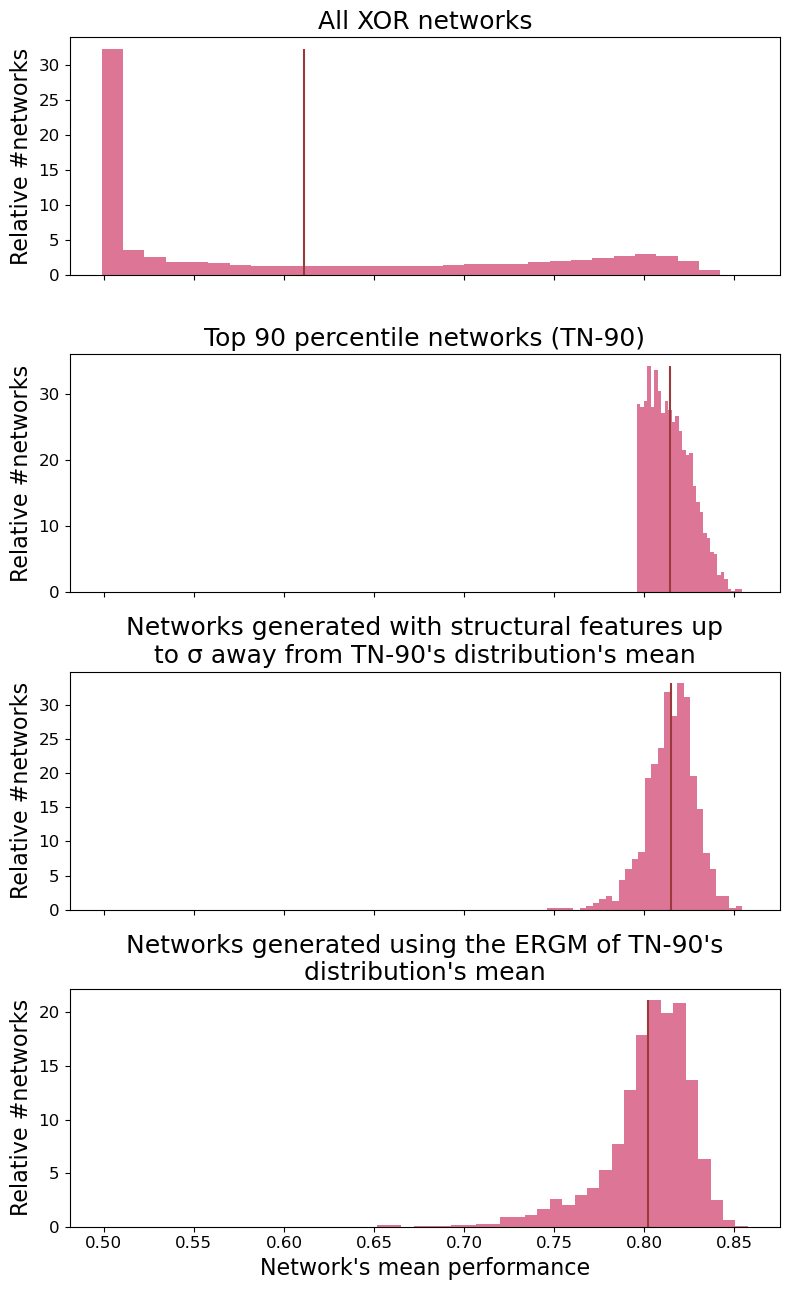

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 13), sharex='all')

n1, bins, patches = ax1.hist(first_analsis_orig['mean_performance'], color=rads[2],  density=True, bins=30,)
ax1.vlines(first_analsis_orig['mean_performance'].mean(), ymin=0, ymax=max(n1),  colors=rads[3])
ax1.set_title("All XOR networks", fontsize=18)

n2, bins, patches = ax2.hist(first_analsis_orig_top['mean_performance'], color=rads[2],  density=True, bins=30,)
ax2.vlines(first_analsis_orig_top['mean_performance'].mean(), ymin=0, ymax=max(n2),  colors=rads[3])
ax2.set_title("Top 90 percentile networks (TN-90)", fontsize=18)

n3, bins, patches = ax3.hist(first_analsis_genet['mean_performance'], color=rads[2],  density=True, bins=30,)
ax3.vlines(first_analsis_genet['mean_performance'].mean(), ymin=0, ymax=max(n3),  colors=rads[3])
ax3.set_title("Networks generated with structural features up\nto \u03C3 away from TN-90's distribution's mean", fontsize=18)

n4, bins, patches =  ax4.hist(first_analsis_ergm['mean_performance'], color=rads[2],  density=True, bins=30,)
ax4.vlines(first_analsis_ergm['mean_performance'].mean(), ymin=0, ymax=max(n4), colors=rads[3])
ax4.set_title("Networks generated using the ERGM of TN-90's\ndistribution's mean",fontsize=18)

ax4.set_yticks(np.arange(max(n4)+1)[::5])
ax4.set_xlabel("Network's mean performance", fontsize=16)
ax1.set_ylabel('Relative #networks', fontsize=16)
ax2.set_ylabel('Relative #networks', fontsize=16)
ax3.set_ylabel('Relative #networks', fontsize=16)
ax4.set_ylabel('Relative #networks', fontsize=16)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_ergm_vs_other_distd.png", dpi=300)

In [17]:
plt.hist([first_analsis_orig_top['mean_performance'],first_analsis_orig['mean_performance'], first_analsis_ergm['mean_performance']], density=True, bins=30,
         label=['top performing architectures', 'generated architectures'], color=[rads[3], rads[2], COLORS[1]])
plt.legend()
plt.xlabel("Architecture's mean performance")
plt.ylabel('Number of Architectures')
plt.title(
    "Mean performance of architectures drawn from an ERGM\ndistribution of the top performing arhitecture feature's space")
#plt.savefig(f"{local_base_path}/plots/for_poster/retina_{num_layers}_layers_{dim1}_{dim2}/gentic_vs_original.png"
            #)

NameError: name 'first_analsis_ergm' is not defined

In [52]:
first_analsis_orig_top['mean_performance'].mean()

0.8139963951005953

In [53]:
first_analsis_genet['mean_performance'].mean()

0.8145453751164957

In [54]:
first_analsis_ergm['mean_performance'].mean()

0.8021494356899483

Text(0.5, 1.0, "Mean performance of architectures drawn from a multivariate normal\ndistribution of the top performing arhitecture feature's space")

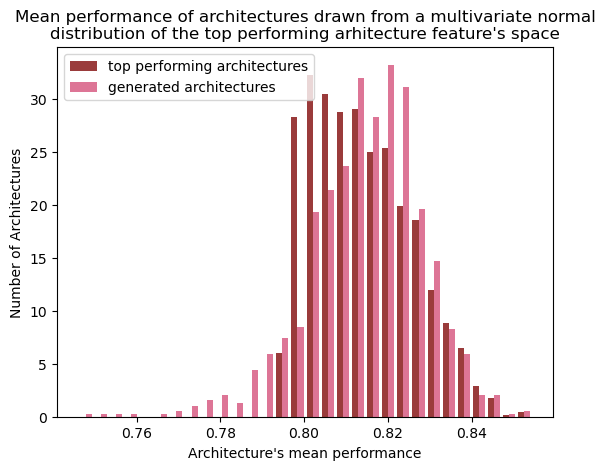

In [41]:


plt.hist([first_analsis_orig_top['mean_performance'], first_analsis_genet['mean_performance']], density=True, bins=30,
         label=['top performing architectures', 'generated architectures'], color=[rads[3], rads[2]])
plt.legend()
plt.xlabel("Architecture's mean performance")
plt.ylabel('Number of Architectures')
plt.title(
    "Mean performance of architectures drawn from a multivariate normal\ndistribution of the top performing arhitecture feature's space")